In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix
%pylab inline

PUIDATA = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


In [2]:
#read data files
nrg = gp.GeoDataFrame.from_csv('/home/cusp/xh895/PUIdata/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
bsize = gp.GeoDataFrame.from_file('/home/cusp/xh895/PUIdata/Manhattan/MNMapPLUTO.shp')

In [3]:
print (nrg.columns)
print (bsize.columns)

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')
Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'Ass

In [4]:
#select the columns we need to a new dataframe
nrg1 = pd.DataFrame(nrg.loc[:,('Site EUI(kBtu/ft2)', 'NYC Borough, Block, and Lot (BBL)',  'Reported Property Floor Area (Building(s)) (ft²)')])
nrg1.head()

,Site EUI(kBtu/ft2),"NYC Borough, Block, and Lot (BBL)",Reported Property Floor Area (Building(s)) (ft²)
Record Number,,,
12086,NaN,1.000410e+09,918919
14354,NaN,4.021460e+09,NaN
12150,NaN,2.027620e+09,64200
12590,NaN,1.006700e+09,NaN
15591,NaN,2.048300e+09,50000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdcca75c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcdcd123ba8>]], dtype=object)

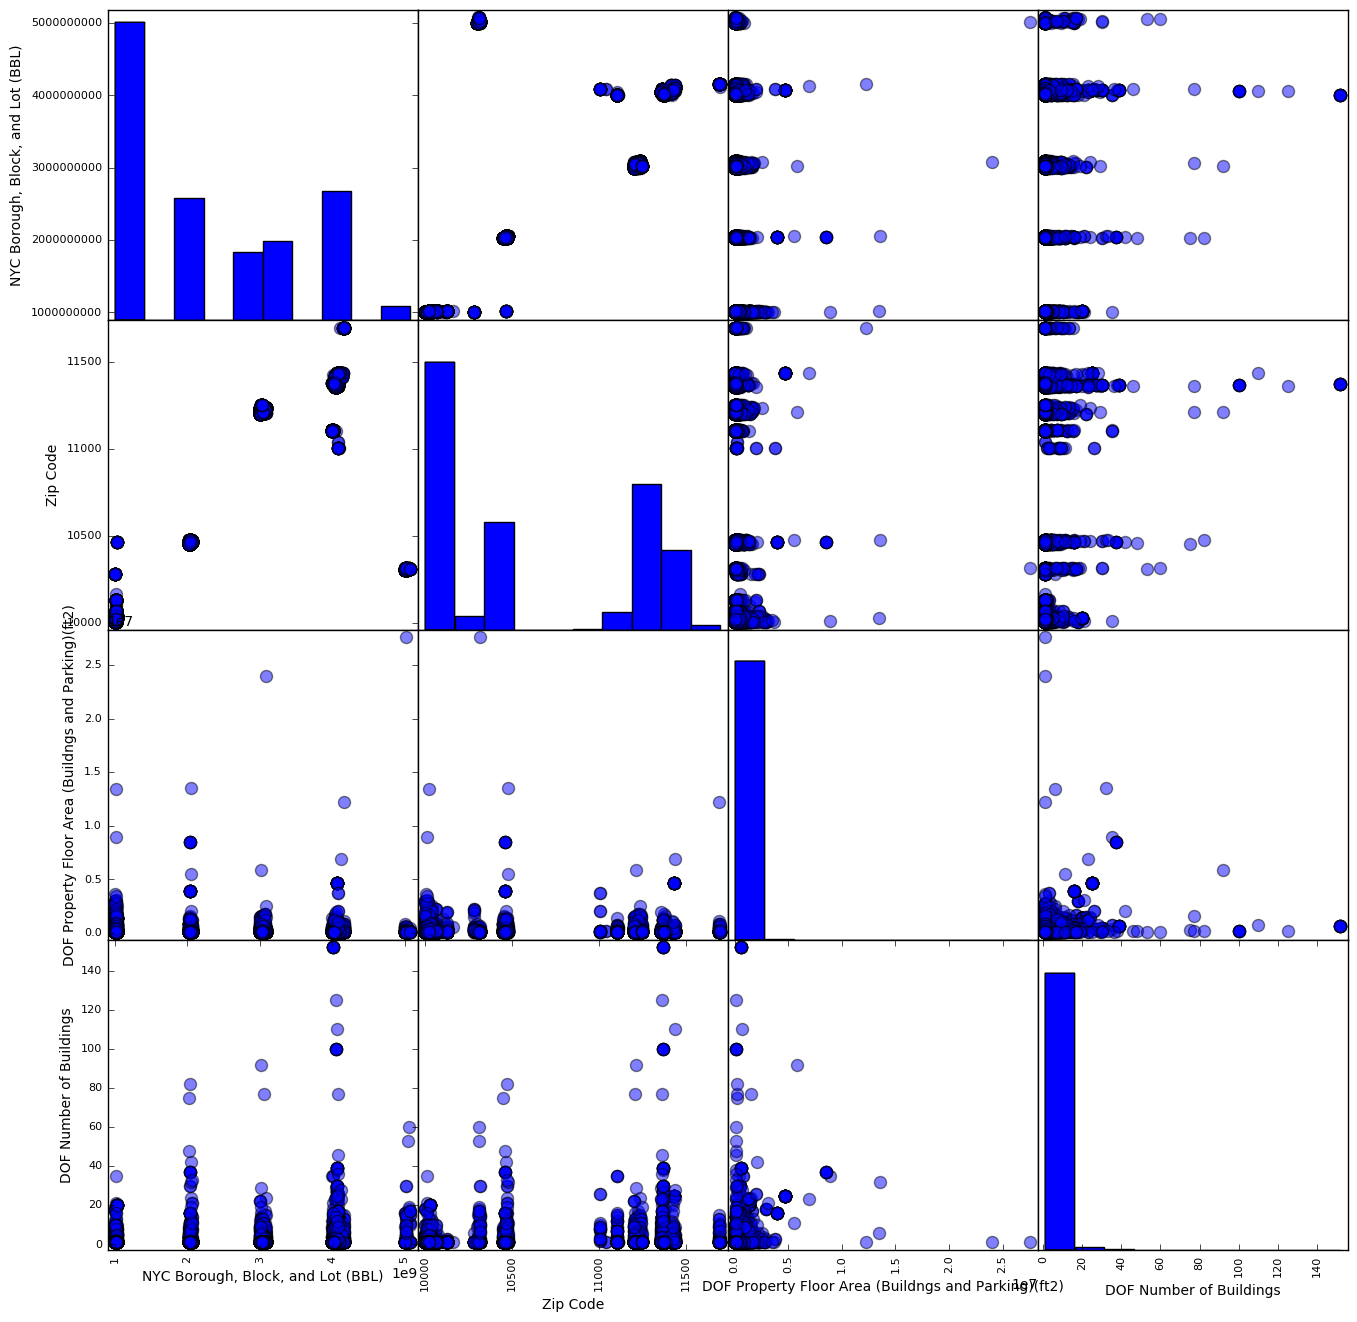

In [5]:
#make a matrix plot to get an overview of the data
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [6]:
def canconvert(mydata):
    '''
    returns data with float type
    '''
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [7]:
# convert type to float. Append float NaN to cells can not be converted.
indx1 = (np.vectorize(canconvert)(nrg1['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx1))
nrg1['Site EUI(kBtu/ft2)'][~indx1] = float(NaN)

indx2 = (np.vectorize(canconvert)(nrg1['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx2))
nrg1['Reported Property Floor Area (Building(s)) (ft²)'][~indx2] = float(NaN)

indx3 = (np.vectorize(canconvert)(nrg1['NYC Borough, Block, and Lot (BBL)']))
print ("invalid entries changed to NaN %d"%sum(indx3))
nrg1['NYC Borough, Block, and Lot (BBL)'][~indx3] = float(NaN)

invalid entries changed to NaN 15513
invalid entries changed to NaN 15430


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


invalid entries changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# changing column name to keep consistency
nrg1 = nrg1.rename(columns = {'NYC Borough, Block, and Lot (BBL)' : 'BBL'})
# choosing data we need from bsize data
bsize1 = pd.DataFrame(bsize.loc[:,['BBL' , 'UnitsTotal']])
# adding a new column suggesting energy consumption
nrg1['energy_consum'] = nrg1['Site EUI(kBtu/ft2)'].astype(float) * nrg1['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdcd771b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcdccdbbcf8>]], dtype=object)

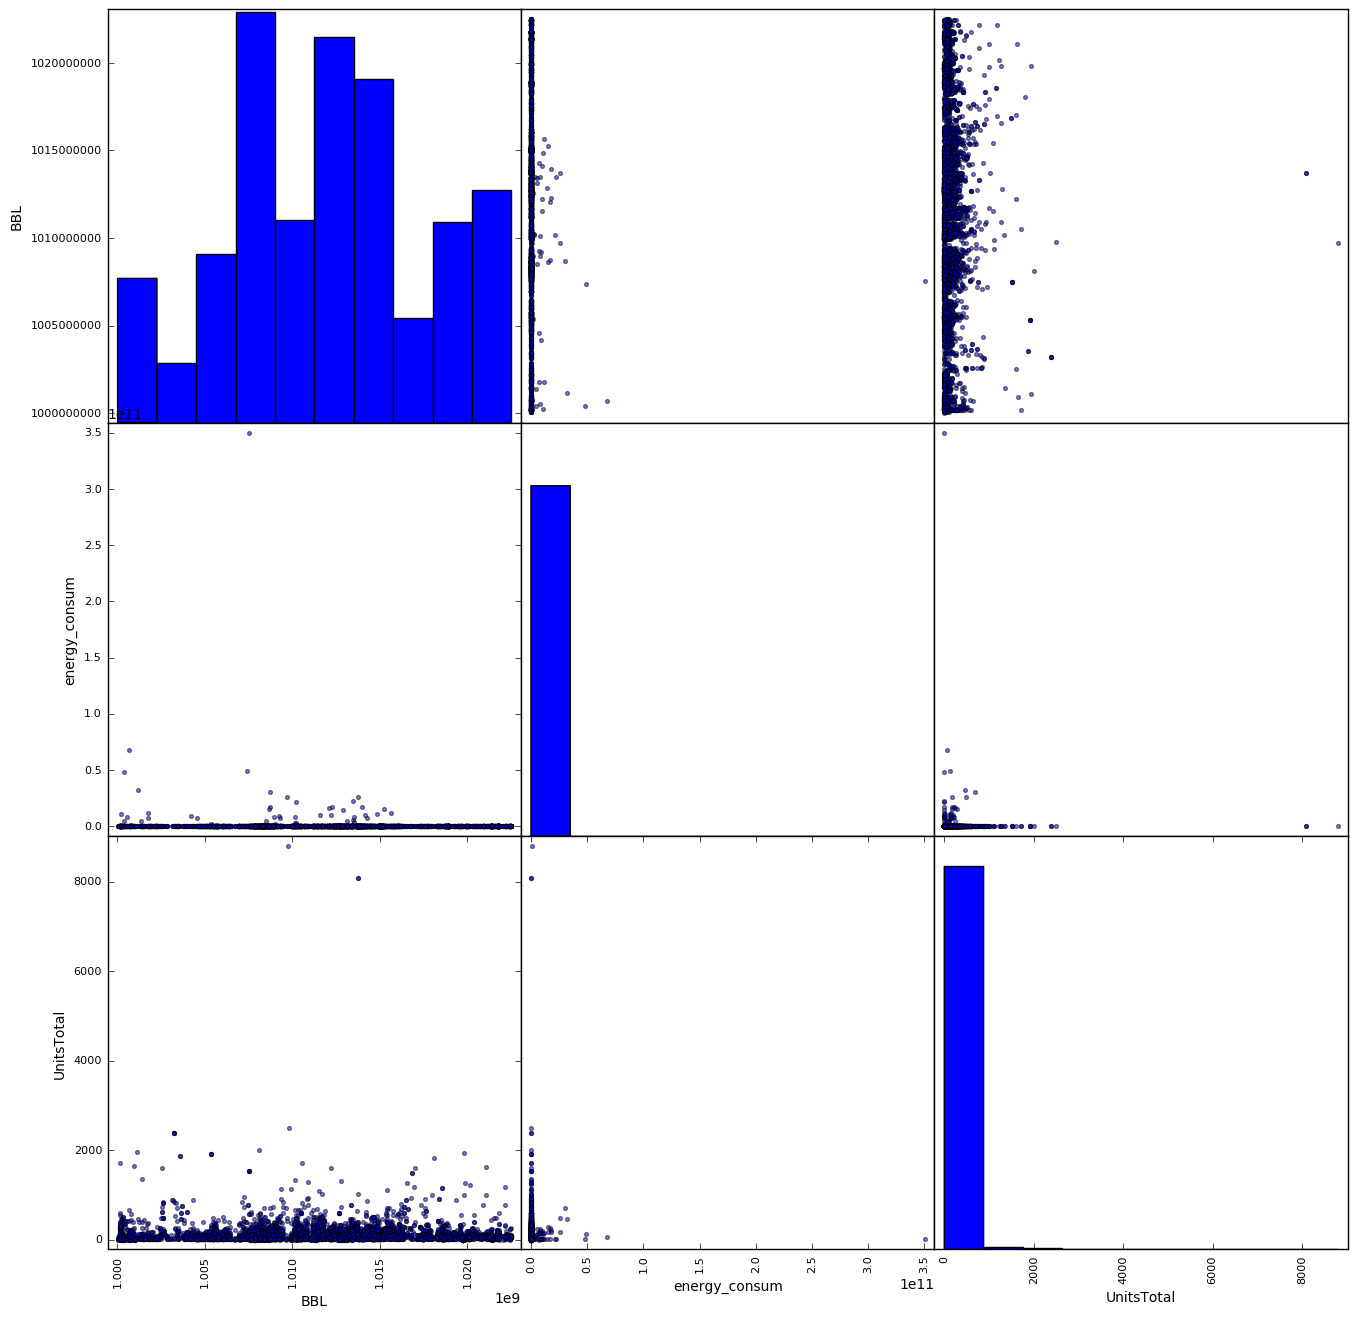

In [9]:
# merge the two dataframes according to BBL
BBLnrgdata = pd.merge(nrg1, bsize1, on = 'BBL')
scatter_matrix (BBLnrgdata, s=30, figsize=(16, 16))

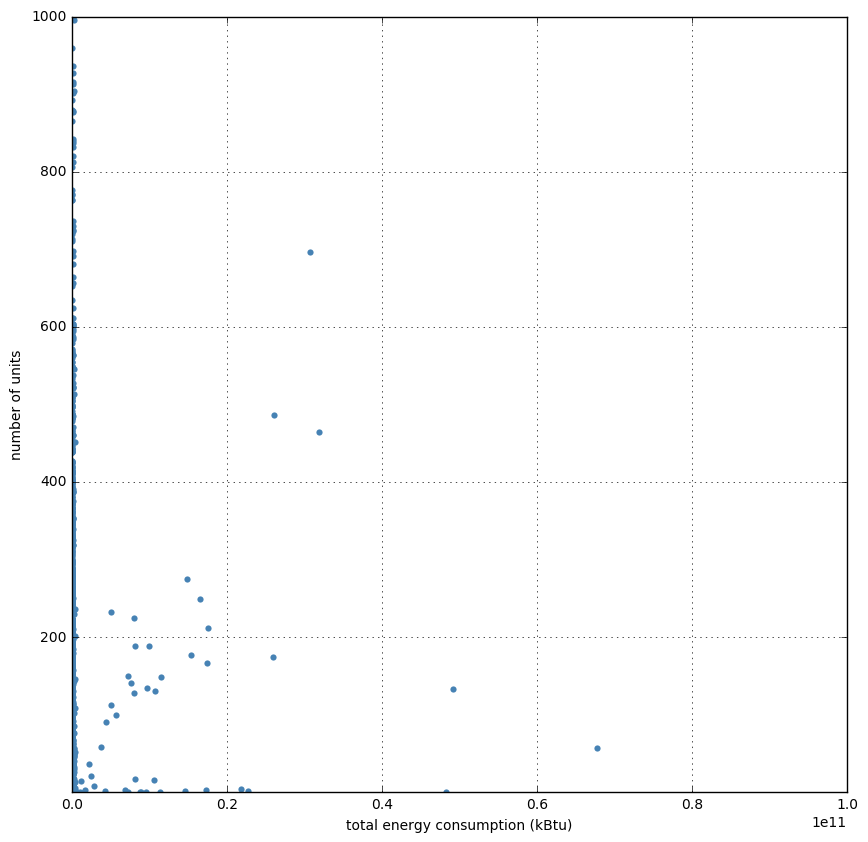

In [10]:
# make the plot

figure = plt.figure(figsize=[10,10])
plt.scatter(BBLnrgdata['energy_consum'] ,BBLnrgdata['UnitsTotal'], lw=0, color='SteelBlue')
plt.xlim([0,1e11])
plt.ylim([1, 1000])
plt.xlabel('total energy consumption (kBtu)')
plt.ylabel('number of units')
plt.grid()

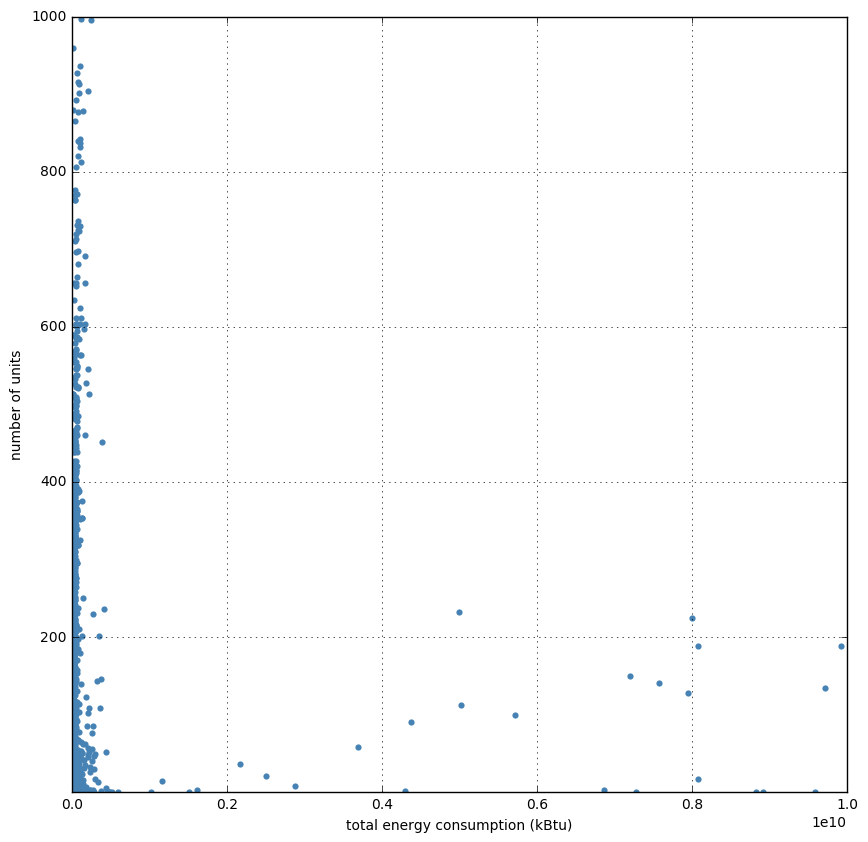

In [11]:
#now we zoom in
figure = plt.figure(figsize=[10,10])
plt.scatter(BBLnrgdata['energy_consum'] ,BBLnrgdata['UnitsTotal'], lw=0, color='SteelBlue')
plt.xlim([0,1e10])
plt.ylim([1, 1000])
plt.xlabel('total energy consumption (kBtu)')
plt.ylabel('number of units')
plt.grid()

In [12]:
#cut out energy consumption data = 0
#cut out total unit data >1e11
BBLnrgdata_cut = BBLnrgdata[BBLnrgdata['energy_consum']> 10]
BBLnrgdata_cut = BBLnrgdata[BBLnrgdata['UnitsTotal']<= 1e11]
BBLnrgdata_cut = BBLnrgdata[BBLnrgdata['UnitsTotal']>0]

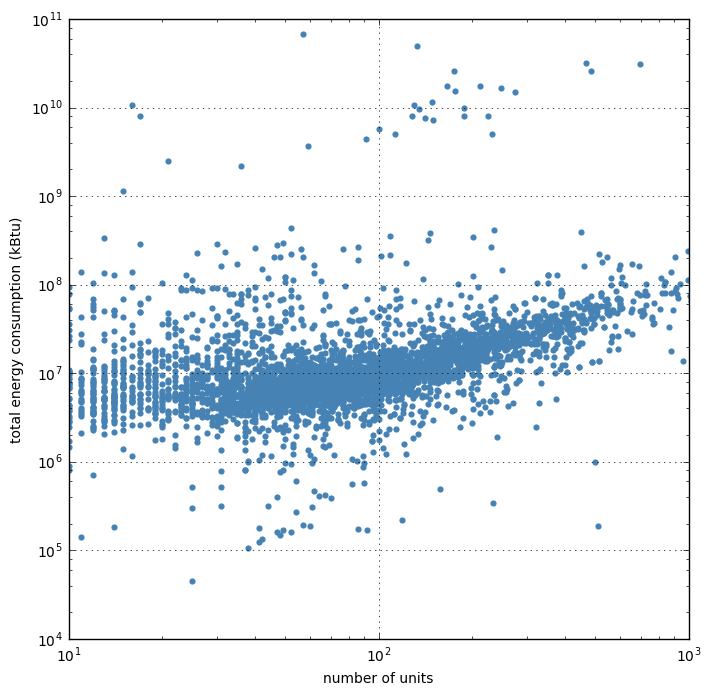

In [13]:
# make plot of the cut data

BBLnrgdata_cut.plot(y = 'energy_consum', x = 'UnitsTotal', marker = 'o', c = 'steelblue', kind = 'scatter', loglog=True, figsize = [8,8], lw = 0)
plt.ylim([1e4,1e11])
plt.xlim([1e1,1e3])
plt.xlabel('number of units')
plt.ylabel('total energy consumption (kBtu)')
plt.grid()

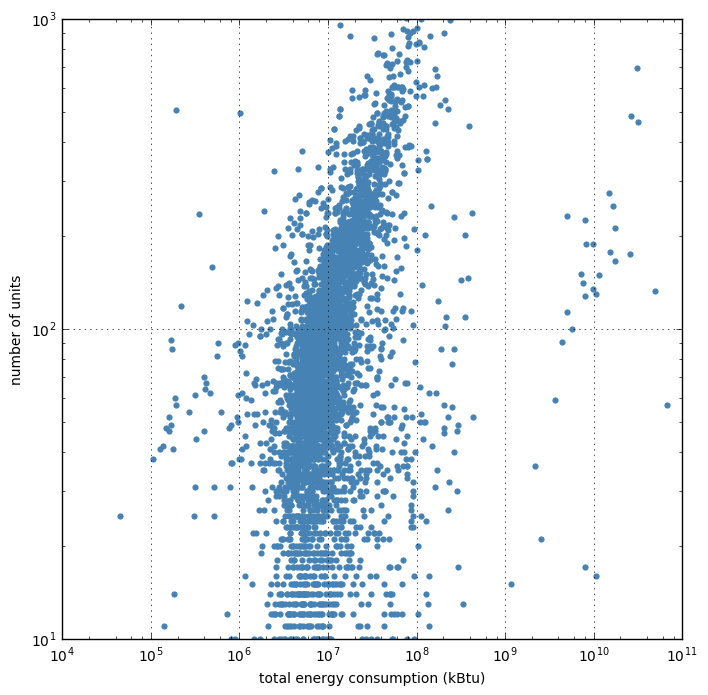

In [14]:
# plot it transposely
BBLnrgdata_cut.plot(x = 'energy_consum', y = 'UnitsTotal', marker = 'o', c = 'steelblue', kind = 'scatter', loglog=True, figsize = [8,8], lw = 0)
plt.xlim([1e4,1e11])
plt.ylim([1e1,1e3])
plt.ylabel('number of units')
plt.xlabel('total energy consumption (kBtu)')
plt.grid()

now we do the fitting:

In [15]:
# data cleaning. Select needed columns. Drop Nan.
df1 = BBLnrgdata_cut.iloc[:,(3,4)]
df1 = np.log10(df1)
df1 = df1.dropna()

In [17]:
df1.index = np.arange(0,5011)
df1

,energy_consum,UnitsTotal
0,7.616811,1.748188
1,8.115213,0.301030
2,6.861710,0.903090
3,7.629287,1.380211
4,7.286094,1.380211
5,6.950549,1.792392
6,6.811909,1.929419
7,6.860458,2.107210
8,7.424460,1.000000
9,6.919769,1.785330


In [24]:
X = sm.add_constant(log10(BBLnrgdata_cut.energy_consum))

In [19]:
df1.energy_consum = pd.to_numeric(df1.energy_consum, errors = "coerce")
df1.UnitsTotal = pd.to_numeric(df1.UnitsTotal, errors = "coerce")

In [20]:
df1['energy_consum'].shape
#df1['UnitsTotal'].shape

(5011,)

In [25]:
# make a regression model with independt variable engergy consumption
# units total versus energy consumption

model = sm.OLS(log10(BBLnrgdata_cut.UnitsTotal), X, missing="drop")
fitted = model.fit()

In [26]:
fitted.predict()

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [ ]:
# make a regression model with independt variable engergy consumption
# energy consumption versus unitstotal

#fit1 = sm.OLS(df1['UnitsTotal'], sm.add_constant(df1['energy_consum'])).fit()
#fit1.params

In [ ]:
# calculate their chi-squared statistic


# make a regression model with independt variable total unit number
y = BBLnrgdata_cut.energy_consum
x = BBLnrgdata_cut.UnitsTotal

X = sm.add_constant(np.log10(x))
linmodel2 = sm.OLS(np.log10(y), X, missing='drop').fit()

chisq_value1 = sum() 